In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches

## Calculate random Euler angles

In [4]:
# return n "random" Euler angles in radians
def random(n):
    return 2*np.pi*np.random.rand(n,3)

In [5]:
ea = random(500)
print(ea[:10,])

[[0.65237117 2.77508602 6.00533897]
 [0.82204366 4.27813074 2.25997057]
 [3.15083602 1.00475911 3.41654053]
 [4.99189218 1.19631411 4.91418757]
 [2.02190001 1.22101895 3.20500102]
 [5.42134974 2.2017335  1.00738592]
 [4.79241041 3.72111268 0.53849286]
 [1.83347112 1.50828718 5.96421081]
 [0.5493469  5.82869728 0.82446341]
 [5.24300938 0.83535066 5.7151583 ]]


## Convert Euler angles into rotation matrices

In [6]:
# return rotation matrices from Euler angles ea
def matrices(ea):
    def trans1(a):
        s=list(range(len(a.shape)))
        return np.transpose(a,s[2:]+s[:2])
    def rot_z(a):
        c,s=np.cos(a),np.sin(a)
        u=1.*(a==a); z=0.*u
        return trans1(np.array([[c,-s,z],[s,c,z],[z,z,u]]))
    def rot_x(a):
        c,s=np.cos(a),np.sin(a)
        u=1.*(a==a); z=0.*u
        return trans1(np.array([[u,z,z],[z,c,-s],[z,s,c]]))
    def trans2(a):
        s=list(range(len(a.shape)))
        return np.transpose(a,s[:-2]+s[-1:-3:-1])
    phi1,Phi,phi2=np.transpose(ea)
    r=rot_z(phi2)@rot_x(Phi)@rot_z(phi1)
    return trans2(r)

In [7]:
rot = matrices(ea)
print(rot[:10,])

[[[ 0.60871845 -0.76297748  0.21754818]
  [-0.78727414 -0.54690715  0.28476658]
  [-0.09829183 -0.34461273 -0.93358491]]

 [[-0.1950085   0.72135306 -0.66454605]
  [ 0.68686194 -0.38322613 -0.61754224]
  [-0.70013739 -0.57687737 -0.42073761]]

 [[ 0.96105241  0.27625606 -0.0078016 ]
  [-0.15449126  0.51361653 -0.84399675]
  [-0.22915218  0.81233038  0.53629155]]

 [[-0.28916586 -0.34075081 -0.89457922]
  [ 0.2915194  -0.92146147  0.25675902]
  [-0.91181113 -0.18654126  0.36579067]]

 [[ 0.45462553 -0.2801636   0.84547264]
  [ 0.88869113  0.20612518 -0.40956133]
  [-0.05952902  0.93756108  0.34268867]]

 [[-0.03084678  0.78955431 -0.61290494]
  [ 0.7300749   0.43660874  0.52570282]
  [ 0.68267058 -0.43125027 -0.58990176]]

 [[-0.35911177  0.75701036  0.54587   ]
  [ 0.89003668  0.45378241 -0.04377477]
  [-0.28084416  0.47012429 -0.83672559]]

 [[-0.22764868  0.1387117   0.96381282]
  [-0.92207337  0.28743374 -0.25915738]
  [-0.31298049 -0.94770296  0.06246845]]

 [[ 0.23462889  0.944674

## Plot pole figures

In [8]:
# plot p pole figure from rotation matrices rot
def plot(rot, p, *args, **kvargs):
    def circle1(size):
        plt.figure(figsize=(size,size))
        ax = plt.gca()
        # Make the circle patch and add to the figure
        circle = plt.Circle((0, 0), 1, color='#777', fill=None)
        ax.add_patch(circle)   
        # Make it a perfect circle by making it a perfect square box
        ax.set_aspect('equal', adjustable='box')
        # Set axis so it's visible 
        plt.xlim([-1.01,1.01])  
        plt.ylim([-1.01,1.01])
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.set_xticks([])
        ax.set_yticks([])
    def stereo_n(n,size=3,color='r'):
        n = (np.abs(n[:,2:])<1)*n
        xy = n[:,:2]/(1-n[:,2:])
        yx = -n[:,:2]/(1+n[:,2:])
        m = (xy*xy).sum(axis=1)
        xy = np.where(np.transpose([m,m])<=1,xy,yx)
        circle1(size)
        if isinstance(color, np.ndarray):
            cmap = plt.cm.rainbow
            norm = matplotlib.colors.Normalize(vmin=np.min(color), vmax=np.max(color))
            color = cmap(norm(color))
        plt.scatter(xy[:,0], xy[:,1], color=color, marker='.')
        plt.show()
        plt.close()
    p = np.array(p)
    n = rot@(p/(p*p).sum()**0.5)
    stereo_n(n,*args,**kvargs)

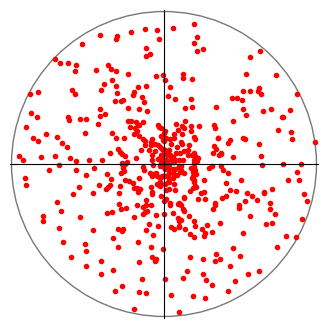

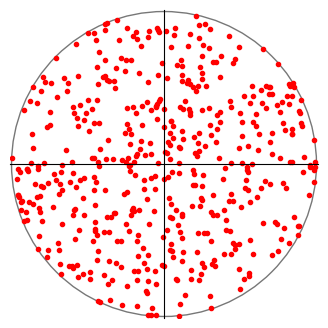

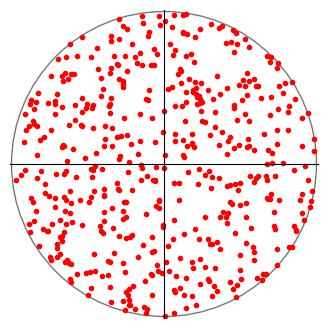

In [9]:
plot(rot, [0,0,1], size=4)
plot(rot, [1,0,0], size=4)
plot(rot, [1,1,0], size=4)

## Calculate misorientations

In [ ]:
#def misorientations(csym, rot):
# NB: you can use itertools.combinations to get all possible pairs

In [ ]:
#cub = ...
#mis = misorientations(cub, rot)

## Jonas' solution

In [2]:
import numpy as np
#calculate random Euler angles
def random():
    Alpha= np.random.uniform(0,2*np.pi)
    Beta = np.random.uniform(0,np.pi)
    Gamma=np.random.uniform(0,2*np.pi)
    return (Alpha,Beta,Gamma)
ea=random()
print(ea)
 
def matrices(ea):
    # ea are the Euler angles as a numpy array of shape (3)
    # return orientation matrix (numpy array of shape (3,3))
    Alpha,Beta,Gamma=ea
    rot_x=np.array([[1,0,0],[0,np.cos(Beta),-np.sin(Beta)],[0,np.cos(Beta),np.sin(Beta)]])
    rot_z_1=np.array([[np.cos(Alpha),-np.sin(Alpha),0],[np.sin(Alpha),np.cos(Alpha),0],[0,0,1]])
    rot_z_2=np.array([[np.cos(Gamma),-np.sin(Gamma),0],[np.sin(Gamma),np.cos(Gamma),0],[0,0,1]])
 
   
    r=rot_z_2@rot_x@rot_z_1
    return np.transpose(r)
r=matrices(ea)
print(r)

(3.8445885812017555, 1.7199168177489275, 5.126555043337998)
[[-0.21908523  0.73705975  0.09605042]
 [ 0.36393249 -0.54623284  0.11334416]
 [-0.90529267 -0.39796056  0.98890213]]
